In [110]:
###############################################################################
#                          1. Importing Libraries                             #
###############################################################################

# To chart out stock data
from pylab import plt, mpl  
plt.style.use('seaborn')  
mpl.rcParams['font.family'] = 'serif'  
%matplotlib inline

# To create datetime objects 
import io
import requests
import datetime 
from datetime import date
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from sqlite3 import Error


# To grab stock data
import yfinance as fyf
from pandas_datareader import data as pdr
fyf.pdr_override() # <-- Here is the fix

# Create connection to SQLite database
con = sqlite3.connect('Finance_Dashboard.db')

# Define Objects
transaction = pd.read_csv(r'https://raw.githubusercontent.com/waltmanjk/Finance/master/dummy_cost_unit.csv')

In [111]:
###############################################################################
#                               2. Read data                                  #
###############################################################################

# Set label
sample = ["AGG","VWELX","FPURX","SPY"]

# Set start and end dates
start = datetime.datetime(2015, 1, 1)
end   = datetime.datetime(2020, 5, 4)

# Grab data
df_quote = pdr.get_data_yahoo(sample, start = start, end = end)

[*********************100%***********************]  4 of 4 completed


The quotes is a MultiIndex data frame, let's look at just the "Close" level for stock quotes.

In [112]:
quotes = df_quote['Close']

In [113]:
quotes

,AGG,FPURX,SPY,VWELX
Date,,,,
2015-01-02,110.430000,21.490000,205.429993,39.160000
2015-01-05,110.669998,21.230000,201.720001,38.730000
2015-01-06,110.949997,21.080000,199.820007,38.599998
2015-01-07,110.930000,21.280001,202.309998,38.840000
2015-01-08,110.760002,21.530001,205.899994,39.259998
...,...,...,...,...
2020-04-27,116.820000,21.799999,287.049988,39.880001
2020-04-28,117.279999,21.660000,285.730011,39.790001
2020-04-29,117.360001,22.000000,293.209991,40.400002


# Write to CSV or to SQLite

In [114]:
quotes.to_csv("dummy_quotes.csv", index=True)

# Establish a connection with the SQLite database

Please download the Dummy_Finance.db file stored in the Repository

In [115]:
def sql_connection():

    try:

        con = sqlite3.connect('Dummy_Finance.db')

        print("Connection is established")

    except Error:

        print(Error)

    finally:

        con.close()

In [116]:
sql_connection()

Connection is established


# The next line can be used to execute any change to the database

In this example, this code will create a new table called "employees"

In [9]:
#def sql_table(con):

#    cursorObj = con.cursor()

#    cursorObj.execute("CREATE TABLE employees(id integer PRIMARY KEY, name text, salary real, department text, position text, hireDate text)")

#    con.commit()

In [10]:
# sql_table(con)

# Run SELECT statement from SQLite database

In [76]:
def sql_fetch(con):

    cursorObj = con.cursor()

    cursorObj.execute('SELECT * FROM dummy_cost_unit limit 5;')

    rows = cursorObj.fetchall()

    for row in rows:

        print(row)

In [77]:
sql_fetch(con)

('2015-01-28 00:00:00', '2015 Q1', 'Taxable', 'AGG', 'Stock Purchase', 0.24, 112.07, 26.7, 26.7, 0.24, None)
('2015-02-02 00:00:00', '2015 Q1', 'Taxable', 'AGG', 'Dividend', 0.0, 112.2, 0.04, 26.74, 0.24, 0.18)
('2015-02-11 00:00:00', '2015 Q1', 'Taxable', 'AGG', 'Stock Purchase', 0.6, 110.87, 66.75, 93.49, 0.84, None)
('2015-02-25 00:00:00', '2015 Q1', 'Taxable', 'AGG', 'Stock Purchase', 0.6, 111.32, 66.75, 160.24, 1.44, None)
('2015-03-02 00:00:00', '2015 Q1', 'Taxable', 'AGG', 'Dividend', 0.0, 110.45, 0.27, 160.51, 1.44, 0.19)


# Write back to database; adds new daily records from last update

In [78]:
quotes.to_sql("dummy_quotes", con, if_exists="replace")

# Now let's load our transactional data

In [79]:
url="https://raw.githubusercontent.com/waltmanjk/Finance/master/dummy_cost_unit.csv"
s=requests.get(url).content
transaction=pd.read_csv(io.StringIO(s.decode('utf-8')))  

## The above line of code helps convert the HTML url from Github and ensures the .csv file is passed into read_csv

In [80]:
transaction['date'] = transaction['date'].astype('datetime64[ns]')
transaction.set_index('date', inplace=True)

In [81]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 643 entries, 2015-01-28 to 2020-04-08
Data columns (total 10 columns):
quarter        643 non-null object
account        643 non-null object
symbol         643 non-null object
type           643 non-null object
num_shares     643 non-null float64
share_price    643 non-null float64
principal      643 non-null float64
sym_total      643 non-null float64
run_share2     643 non-null float64
dividend       127 non-null float64
dtypes: float64(6), object(4)
memory usage: 55.3+ KB


In [82]:
transaction.columns

Index(['quarter', 'account', 'symbol', 'type', 'num_shares', 'share_price',
       'principal', 'sym_total', 'run_share2', 'dividend'],
      dtype='object')

In [83]:
transaction

,quarter,account,symbol,type,num_shares,share_price,principal,sym_total,run_share2,dividend
date,,,,,,,,,,
2015-01-28,2015 Q1,Taxable,AGG,Stock Purchase,0.24,112.07,26.70,26.70,0.24,NaN
2015-02-02,2015 Q1,Taxable,AGG,Dividend,0.00,112.20,0.04,26.74,0.24,0.18
2015-02-11,2015 Q1,Taxable,AGG,Stock Purchase,0.60,110.87,66.75,93.49,0.84,NaN
2015-02-25,2015 Q1,Taxable,AGG,Stock Purchase,0.60,111.32,66.75,160.24,1.44,NaN
2015-03-02,2015 Q1,Taxable,AGG,Dividend,0.00,110.45,0.27,160.51,1.44,0.19
...,...,...,...,...,...,...,...,...,...,...
2020-03-10,2020 Q1,Taxable,VWELX,Stock Purchase,5.28,40.49,213.60,11848.70,290.08,NaN
2020-03-11,2020 Q1,Taxable,VWELX,Stock Purchase,3.84,39.10,150.00,11998.70,293.91,NaN
2020-03-20,2020 Q1,Taxable,VWELX,Dividend,2.37,33.62,79.60,12078.30,295.90,0.27


# This step is used to remove spaces from stock symbols

In [84]:
transaction['symbol'].str.strip()

date
2015-01-28      AGG
2015-02-02      AGG
2015-02-11      AGG
2015-02-25      AGG
2015-03-02      AGG
              ...  
2020-03-10    VWELX
2020-03-11    VWELX
2020-03-20    VWELX
2020-03-25    VWELX
2020-04-08    VWELX
Name: symbol, Length: 643, dtype: object

In [85]:
transaction.to_csv("transaction_clean.csv", index=True)

In [86]:
transaction.to_sql("dummy_cost_unit", con, if_exists="replace")

# Now, let's narrow down the table to query only the stock purchases, dividend, and capital gain reinvestment to calculate the average share price per transaction.

In [87]:
chart = transaction.loc[(transaction['symbol'] == 'FPURX') & (transaction['type'] == 'Stock Purchase')]

In [88]:
chart

,quarter,account,symbol,type,num_shares,share_price,principal,sym_total,run_share2,dividend
date,,,,,,,,,,
2015-01-28,2015 Q1,Taxable,FPURX,Stock Purchase,1.25,21.31,26.70,26.70,1.25,NaN
2015-02-11,2015 Q1,Taxable,FPURX,Stock Purchase,3.07,21.71,66.75,93.45,4.32,NaN
2015-02-25,2015 Q1,Taxable,FPURX,Stock Purchase,3.01,22.16,66.75,160.20,7.33,NaN
2015-03-11,2015 Q1,Taxable,FPURX,Stock Purchase,3.06,21.81,66.75,226.95,10.39,NaN
2015-03-25,2015 Q1,Taxable,FPURX,Stock Purchase,3.04,21.99,66.75,293.70,13.43,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-02-24,2020 Q1,Taxable,FPURX,Stock Purchase,0.14,23.19,3.20,11518.02,529.78,NaN
2020-03-10,2020 Q1,Taxable,FPURX,Stock Purchase,9.87,21.63,213.60,11731.62,539.65,NaN
2020-03-11,2020 Q1,Taxable,FPURX,Stock Purchase,7.17,20.92,150.00,11881.62,546.82,NaN


# This step will pull all values used to calculate the Cost Basis for each transaction

In [89]:
search_values = ['Stock Purchase','Dividend']

Above are the three conditions for transaction type: Stock Purchase, Dividend, and Fees. These three impact the final purchase amount of each share summed together.

In [90]:
cost_basis = transaction[transaction.type.str.contains('|'.join(search_values))]

In [91]:
cost_basis.groupby(['symbol']).mean()

,num_shares,share_price,principal,sym_total,run_share2,dividend
symbol,,,,,,
AGG,0.514740,109.590885,56.228125,5494.530938,50.309427,0.233651
FPURX,3.666026,21.689735,79.576225,5886.061325,274.497417,0.332091
SPY,0.297400,245.921400,71.346400,5462.666200,24.360667,1.222381
VWELX,2.034133,40.043733,81.189733,5919.222467,148.825200,0.604286


This query allows us to pull just the data for the Fidelity Balanced K Fund.

In [92]:
agg = cost_basis[(cost_basis.symbol == 'AGG') & (cost_basis.type.isin(search_values))]
puritan = cost_basis[(cost_basis.symbol == 'FPURX') & (cost_basis.type.isin(search_values))]
spy = cost_basis[(cost_basis.symbol == 'SPY') & (cost_basis.type.isin(search_values))]
well = cost_basis[(cost_basis.symbol == 'VWELX') & (cost_basis.type.isin(search_values))]

In [93]:
agg_ = agg['share_price']
puritan_ = puritan['share_price']
spy_ = spy['share_price']
well_ = well['share_price']

In [99]:
daily = quotes.AGG
daily1 = quotes.FPURX
daily2 = quotes.SPY
daily3 = quotes.VWELX

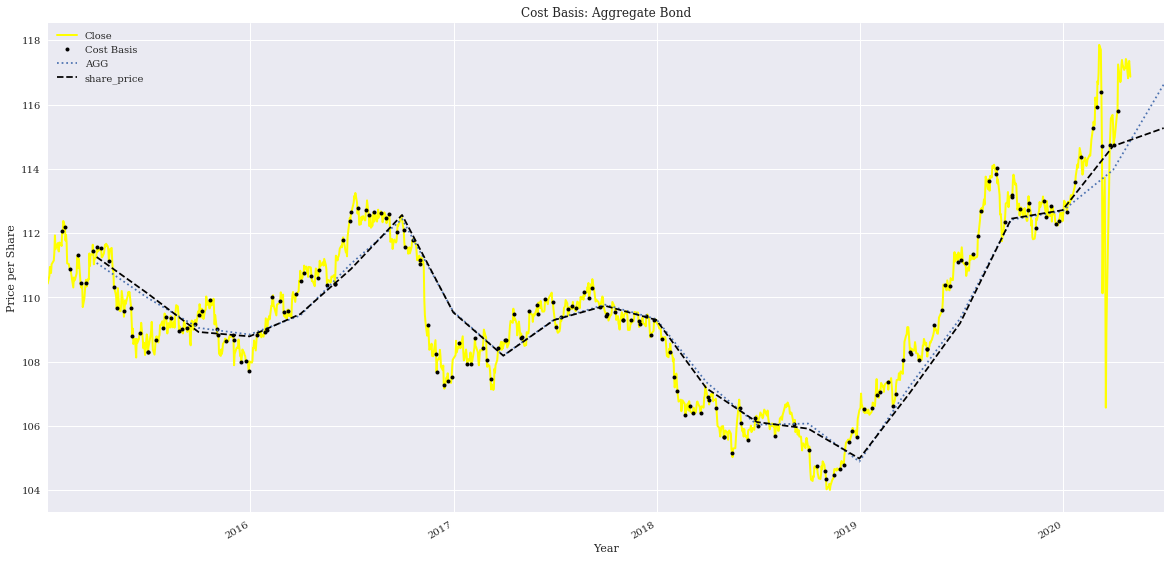

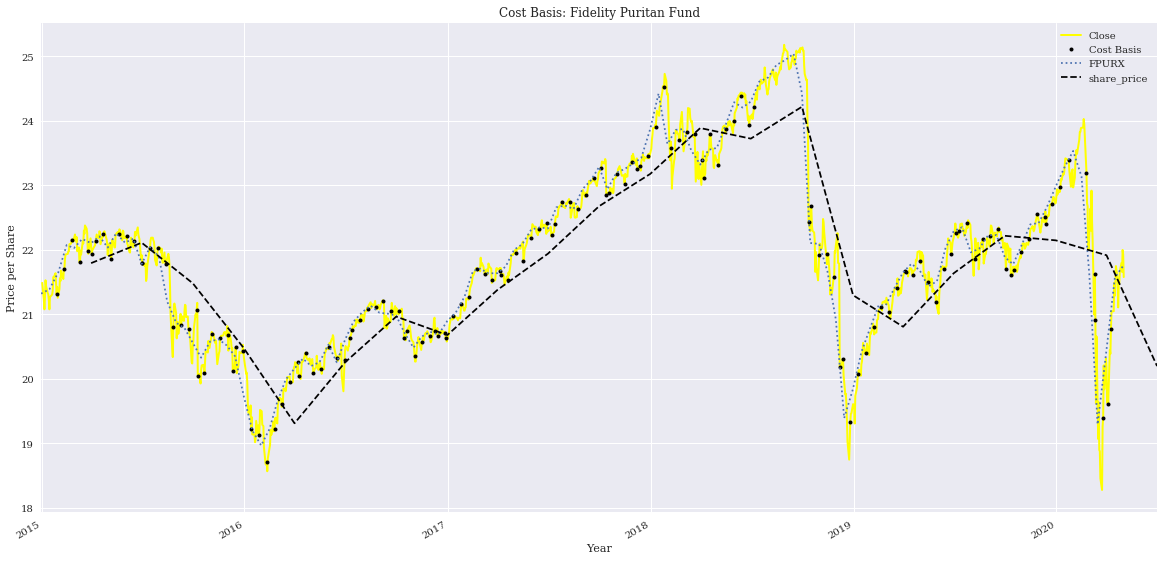

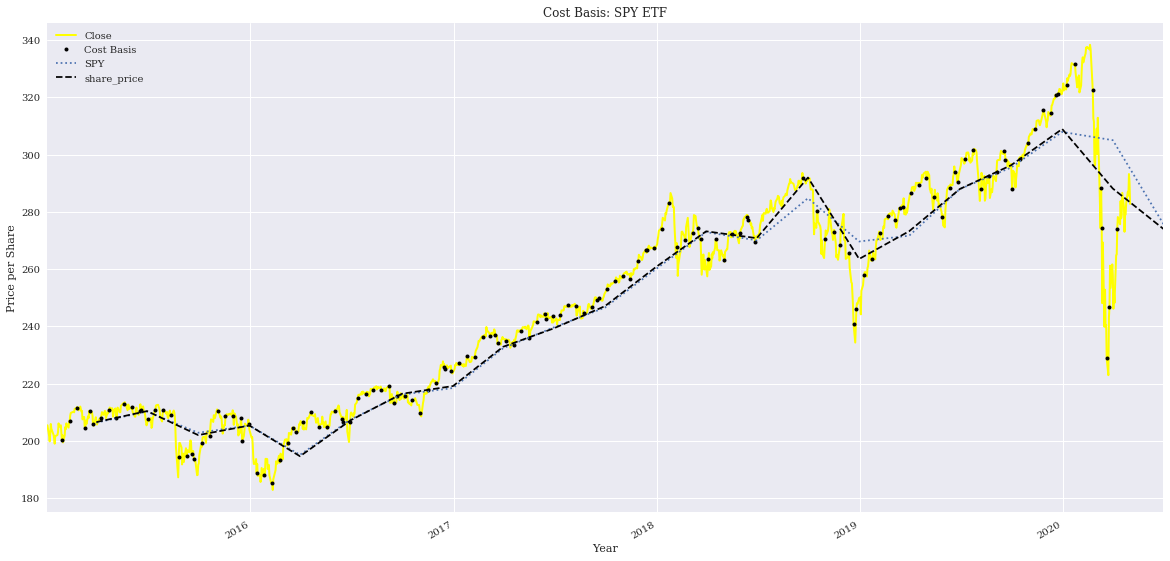

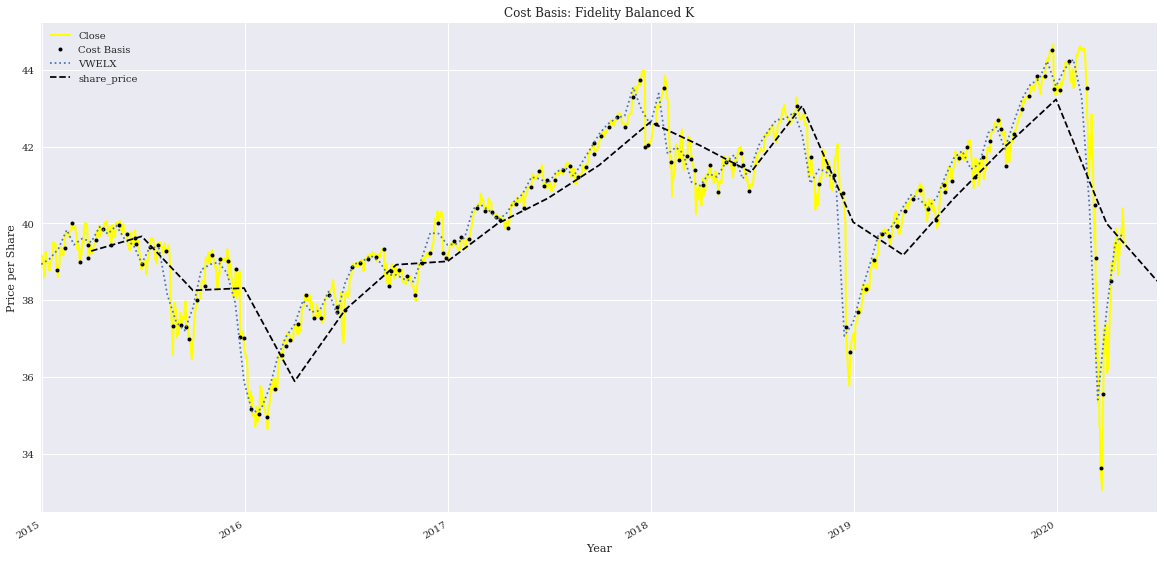

In [101]:
plt.figure(figsize=(20,10))
plt.plot(daily, color='yellow',linewidth=2,label="Close")
plt.plot(agg_, marker='o', markerfacecolor='black', markersize=4, color='red', linewidth=0,label="Cost Basis")
daily.resample('Q').mean().plot(style=':')
agg_.resample('Q').mean().plot(color='black',style='--')

plt.plot()

plt.xlabel('Year')
plt.ylabel('Price per Share')
plt.title('Cost Basis: Aggregate Bond')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
plt.plot(daily1, color='yellow',linewidth=2,label="Close")
plt.plot(puritan_, marker='o', markerfacecolor='black', markersize=4, color='red', linewidth=0,label="Cost Basis")
daily1.resample('SM').mean().plot(style=':')
puritan_.resample('Q').mean().plot(color='black',style='--')

plt.xlabel('Year')
plt.ylabel('Price per Share')
plt.title('Cost Basis: Fidelity Puritan Fund')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
plt.plot(daily2, color='yellow',linewidth=2,label="Close")
plt.plot(spy_, marker='o', markerfacecolor='black', markersize=4, color='red', linewidth=0,label="Cost Basis")
daily2.resample('Q').mean().plot(style=':')
spy_.resample('Q').mean().plot(color='black',style='--')

plt.plot()

plt.xlabel('Year')
plt.ylabel('Price per Share')
plt.title('Cost Basis: SPY ETF')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
plt.plot(daily3, color='yellow',linewidth=2,label="Close")
plt.plot(well_, marker='o', markerfacecolor='black', markersize=4, color='red', linewidth=0,label="Cost Basis")
daily3.resample('SM').mean().plot(style=':')
well_.resample('Q').mean().plot(color='black',style='--')

plt.xlabel('Year')
plt.ylabel('Price per Share')
plt.title('Cost Basis: Fidelity Balanced K')
plt.grid(True)
plt.legend()
plt.show()

In [102]:
merge=pd.merge(daily, agg_, how='outer', left_index=True, right_index=True)
merge1=pd.merge(daily1, puritan_, how='outer', left_index=True, right_index=True)
merge2=pd.merge(daily2, spy_, how='outer', left_index=True, right_index=True)
merge3=pd.merge(daily3, well_, how='outer', left_index=True, right_index=True)

In [103]:
merge.sort_index()
merge1.sort_index()
merge2.sort_index()
merge3.sort_index()

,VWELX,share_price
2015-01-02,39.160000,NaN
2015-01-05,38.730000,NaN
2015-01-06,38.599998,NaN
2015-01-07,38.840000,NaN
2015-01-08,39.259998,NaN
...,...,...
2020-04-27,39.880001,NaN
2020-04-28,39.790001,NaN
2020-04-29,40.400002,NaN
2020-04-30,40.060001,NaN


Create Cost Basis table.

Table 1: Daily quote for that stock or mutual fund Table 2: Average price per share of biweekly 401k contributions


In [106]:
merge=pd.merge(daily, agg_, how='outer', left_index=True, right_index=True)
merge1=pd.merge(daily1, puritan_, how='outer', left_index=True, right_index=True)
merge2=pd.merge(daily2, spy_, how='outer', left_index=True, right_index=True)
merge3=pd.merge(daily3, well_, how='outer', left_index=True, right_index=True)


In [107]:
merge

,AGG,share_price
2015-01-02,110.430000,NaN
2015-01-05,110.669998,NaN
2015-01-06,110.949997,NaN
2015-01-07,110.930000,NaN
2015-01-08,110.760002,NaN
...,...,...
2020-04-27,116.820000,NaN
2020-04-28,117.279999,NaN
2020-04-29,117.360001,NaN
2020-04-30,117.099998,NaN


Check to see that your join works correctly

This cell writes the individual stock cost basis over time to SQLite

In [108]:
merge.to_sql("cb_agg", con, if_exists="replace")
merge1.to_sql("cb_puritan", con, if_exists="replace")
merge2.to_sql("cb_spy", con, if_exists="replace")
merge3.to_sql("cb_wellington", con, if_exists="replace")

Let's add the daily quote tables to SQLite

In [109]:
daily.to_sql("daily_agg", con, if_exists="replace")
daily1.to_sql("daily_puritan", con, if_exists="replace")
daily2.to_sql("daily_spy", con, if_exists="replace")
daily3.to_sql("daily_wellington", con, if_exists="replace")